In [12]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

**Adaptation Test Dataset**  
models/pretrained_2023-09-20_22-18-02.pt  
30_episodes_normal  
models/2d_fetch/model_2023-10-01_18-13-55.pkl  
10_episodes_medium  
models/2d_fetch/model_2023-10-01_18-16-49.pkl  
10_episodes_low  
models/2d_fetch/model_2023-10-01_18-20-11.pkl  

In [161]:
# both with model models/pretrained_2023-09-20_22-18-02.pt
video_filename_1 = 'datasets/OnlineData/episodes_2023-09-20_22-44-56.pkl'
video_filename_2 = 'datasets/OnlineData/episodes_2023-09-21_09-33-30.pkl'
video_filename_3 = 'datasets/OnlineData/episodes_2023-09-21_17-27-17.pkl'
with open(video_filename_3, 'rb') as f:
    data = pickle.load(f)

In [162]:
rewards = np.array([d['rewards'].numpy().squeeze().sum() for d in data])
goals = np.array([abs(d['goal'].sum()) for d in data])

rewards_by_goal = rewards / goals

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


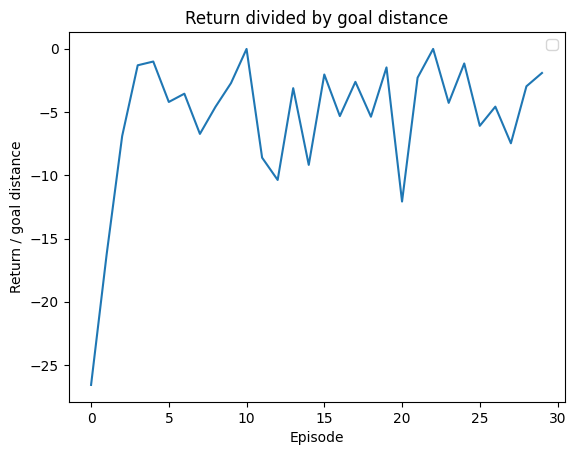

In [172]:
x = np.arange(rewards_by_goal.shape[0])
y = rewards_by_goal
plt.plot(rewards_by_goal)

# x_smooth = np.linspace(x.min(), x.max(), 5)  # Generate smoother X values
# spl = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
# y_smooth = spl(x_smooth)  # Smoothed Y values
# plt.plot(x_smooth, y_smooth, 'r-', label='Smoothed Line')

# smoothed_rl_reward_history = np.convolve(rewards_by_goal, np.ones(10) / 10, mode='same')
# plt.plot(smoothed_rl_reward_history, label='Smoothed Line')

plt.title('Return divided by goal distance')
plt.xlabel('Episode')
plt.ylabel('Return / goal distance')
plt.legend()

In [2]:
import torch
from vit_pytorch import ViT

/opt/homebrew/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/opt/homebrew/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <06D2C3BD-26E5-3AB9-A866-63839BE393A7> /opt/homebrew/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <66FB8649-BB87-3CD6-A177-462038DCAE02> /opt/homebrew/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [59]:
class EMGViT(ViT):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def __call__(self, x: torch.Tensor):
        x.unsqueeze_(axis=1)
        return self.forward(x)

In [60]:
model = ViT(
    image_size=200,
    patch_size=8,
    num_classes=7,
    dim=64,
    depth=1,
    heads=2,
    mlp_dim=128,
    dropout=0.2,
    emb_dropout=0.2,
    channels=1,
).to(device='cpu')

In [61]:
model.forward(torch.randn(10,1,200,8))

tensor([[ 0.5948,  1.0361, -0.1808, -1.0980, -1.5035, -0.2605,  0.4917],
        [ 0.9077,  0.0384, -0.3850, -0.0749, -0.5954, -0.0318,  0.3935],
        [ 0.7600,  0.3295, -0.5052, -0.5812, -0.8427, -0.2122,  0.4643],
        [ 0.6906,  0.7091,  0.1632, -0.3964, -0.6651, -0.3466,  1.0166],
        [ 0.4699,  0.2284, -0.5402, -0.3213, -0.6052, -0.5519,  0.1127],
        [ 0.9104,  0.8059, -0.2443, -0.6904, -0.7954, -0.6228,  0.5634],
        [ 0.7950,  0.4523, -0.2518, -1.0952, -1.2142, -1.2513,  0.4859],
        [ 0.8354,  0.1620, -0.0692, -0.6995, -0.7107, -1.6821,  0.7627],
        [ 0.8229,  0.5481,  0.0181, -0.5109, -0.9795, -0.7731,  0.7060],
        [ 0.6476,  0.4521, -0.2224,  0.0667, -0.4546, -0.1094,  0.8084]],
       grad_fn=<AddmmBackward0>)

In [64]:
model = EMGViT(
    image_size=200,
    patch_size=8,
    num_classes=7,
    dim=64,
    depth=1,
    heads=2,
    mlp_dim=128,
    dropout=0.2,
    emb_dropout=0.2,
    channels=1,
).to(device='cpu')

In [69]:
model(torch.randn(10,200,8))

tensor([[ 0.4513, -0.1762, -0.2698,  0.2188,  1.5274, -0.2498, -1.1679],
        [ 0.7944, -0.2512, -0.2062,  0.5329,  1.7026, -0.2875, -0.8374],
        [ 0.3343, -0.1822, -0.1794,  0.4836,  1.4454,  0.2992, -0.8864],
        [ 0.6591,  0.0170, -0.0381,  0.2245,  1.3783, -0.3656, -0.9091],
        [ 0.6894, -0.4164,  0.1391,  0.4071,  1.5891,  0.4112, -0.5995],
        [ 0.7603, -0.3025, -0.1985,  0.2570,  1.7653, -0.0727, -0.9783],
        [ 0.8426,  0.0694, -0.5805,  0.2712,  1.7133, -0.0442, -0.8174],
        [ 0.5227, -0.2257, -0.1562,  0.4016,  1.6836, -0.4500, -0.7659],
        [ 0.5357,  0.0393, -0.1872, -0.0332,  0.8864, -0.2200, -0.9696],
        [ 0.1935, -0.4391, -0.6544, -0.4081,  1.2295,  0.1256, -0.5318]],
       grad_fn=<AddmmBackward0>)

In [ ]:
import torch

# import our library
import torchmetrics

In [50]:
# initialize metric
metric = torchmetrics.classification.Accuracy(task="binary", num_classes=5,  threshold=0.5)

# move the metric to device you want computations to take place
device = "cuda" if torch.cuda.is_available() else "cpu"
metric.to(device)

n_batches = 10
for i in range(n_batches):
    # simulate a classification problem
    preds = torch.randn(10, 5).softmax(dim=-1).to(device)
    target = torch.randint(2, (10,5)).to(device)

    # metric on current batch
    acc = metric(preds, target)
    print(f"Accuracy on batch {i}: {acc}")

# metric on all batches using custom accumulation
acc = metric.compute()
print(f"Accuracy on all data: {acc}")

Accuracy on batch 0: 0.5799999833106995
Accuracy on batch 1: 0.5400000214576721
Accuracy on batch 2: 0.5
Accuracy on batch 3: 0.5199999809265137
Accuracy on batch 4: 0.5199999809265137
Accuracy on batch 5: 0.46000000834465027
Accuracy on batch 6: 0.4399999976158142
Accuracy on batch 7: 0.699999988079071
Accuracy on batch 8: 0.6600000262260437
Accuracy on batch 9: 0.46000000834465027
Accuracy on all data: 0.5379999876022339


In [11]:
import torch
from torchmetrics import ExactMatch, F1Score

In [64]:
# metric = torchmetrics.classification.Accuracy(task="binary", num_classes=5,  threshold=0.5)
metric = ExactMatch(task="multilabel", num_labels=3, threshold=0.5)
pred = torch.tensor([[.6,0,0], [.8,1,0], [0,1,0]])
targ = torch.tensor([[1,0,0], [1,0,0], [0,1,0]])
metric(pred, targ)

tensor(0.6667)

In [63]:
metric = F1Score(task="multilabel", num_labels=3, threshold=0.5)
pred = torch.tensor([[.4,1,1], [1,0,0], [0,1,0]])
targ = torch.tensor([[1,0,1], [1,1,0], [0,1,0]])
metric(pred, targ)

tensor(0.6667)

In [66]:
ep_list = [
    'episodes_2023-09-18_09-39-11.pkl',
'episodes_2023-09-18_09-33-03.pkl',
'episodes_2023-09-18_09-42-15.pkl'
]


In [67]:
sorted(ep_list)

['episodes_2023-09-18_09-33-03.pkl',
 'episodes_2023-09-18_09-39-11.pkl',
 'episodes_2023-09-18_09-42-15.pkl']

In [49]:
import os
import torch
import pathlib
import numpy as np
from adaptive_hci.datasets import load_online_episodes, get_concatenated_user_episodes
from d3rlpy.datasets import MDPDataset

In [50]:
online_data_dir = pathlib.Path('datasets/AdaptationTest')
episode_filenames = sorted(os.listdir(online_data_dir))    
online_data = load_online_episodes(online_data_dir, episode_filenames)

# TODO include other online data?
current_trial_episodes = online_data[0]

(observations,
    actions,
    optimal_actions,
    rewards,
    terminals) = get_concatenated_user_episodes(episodes=current_trial_episodes)

rl_dataset = MDPDataset(observations=observations,
                        actions=actions,
                        rewards=rewards,
                        terminals=terminals)

In [77]:
n_episodes = len(rl_dataset.episodes)
rand_episode_idxs = torch.randint(0, 1, size=(5,)).unique()
rand_episode_idxs

tensor([0])

In [63]:

all_episodes = 

tensor([13,  9])

In [66]:
rl_dataset.episodes[2].observations.shape

(149, 8, 200)

In [71]:
np.concatenate([e.observations for e in rl_dataset.episodes[:2]])

(239, 8, 200)

In [34]:
def pick_random(tensor, n):
    random_indices = torch.randperm(tensor.numel())[:n]
    return tensor[random_indices]

def get_train_observations(observations,
                           optimal_actions,
                           terminal_idxs,
                           ep_idx,
                           n_episodes,
                           take_last_episodes=False,):
    
    available_terminals = terminal_idxs[:ep_idx]

    n_additional_episodes = n_episodes - 1
    random_terminals = pick_random(available_terminals, n_additional_episodes)

    all_terminals = torch.concat((random_terminals, terminal_idxs[ep_idx]))

    for terminal in all_terminals:
        

In [39]:
tensor = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
rand_t = pick_random(tensor, 2)

In [43]:
rand_t

tensor([5, 6])

In [48]:
torch.concat((rand_t, torch.tensor([1])))

tensor([5, 6, 1])

In [1]:
from adaptive_hci.controllers import PLModel, EMGViT
import lightning.pytorch as pl

<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead
objc[86173]: Class GLFWHelper is implemented in both /opt/homebrew/lib/python3.10/site-packages/glfw/libglfw.3.dylib (0x1659e1b88) and /opt/homebrew/Cellar/glfw/3.3.8/lib/libglfw.3.3.dylib (0x17e5d9730). One of the two will be used. Which one is undefined.
objc[86173]: Class GLFWApplicationDelegate is implemented in both /opt/homebrew/lib/python3.10/site-packages/glfw/libglfw.3.dylib (0x1659e1bd8) and /opt/homebrew/Cellar/glfw/3.3.8/lib/libglfw.3.3.dylib (0x17e5d9780). One of the two will be used. Which one is undefined.
objc[86173]: Class GLFWWindowDelegate is implemented in both /opt/homebrew/lib/python3.10/site-packages/glfw/libglfw.3.dylib (0x1659e1c00) and /opt/homebrew/Cellar/glfw/3.3.8/lib/libglfw.3.3.dylib (0x17e5d97a8). One of the two will be used. Which one is undefined.
objc[86173]: Class GLFWContentView is implemented

In [78]:
model = EMGViT(
    image_size=200,
    patch_size=8,
    num_classes=5,
    dim=64,
    depth=1,
    heads=2,
    mlp_dim=128,
    dropout=0.2,
    emb_dropout=0.2,
    channels=1,
).to(device='cpu')

pl_model = PLModel(model=model,
                   n_labels=5,)

In [80]:
pl_model = PLModel.load_from_checkpoint('./adaptive_hci/yp8k1lmf/checkpoints/epoch=0-step=100.ckpt')

In [3]:
import hashlib
import continuously_train_user_model
import configs

experiment_config = configs.SmokeConfig()
user_hash = hashlib.sha256("Kilian".encode("utf-8")).hexdigest()

In [ ]:
continuously_train_user_model.main(finetuned_model=pl_model,
                                   user_hash=user_hash,
                                   config=experiment_config)

In [57]:
trainer = pl.Trainer(limit_train_batches=100,
                    max_epochs=100,
                    log_every_n_steps=1,
                    # logger=logger,
                    )

INFO: GPU available: True (mps), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (mps), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [6]:
from adaptive_hci.datasets import EMGWindowsAdaptationDataset
from torch.utils.data import DataLoader

In [12]:
ep_observations = observations[100:1000]
ep_optimal_actions = optimal_actions[100:1000]

online_adaptation_dataset = EMGWindowsAdaptationDataset(ep_observations, ep_optimal_actions)

online_adaptation_dataloader = DataLoader(online_adaptation_dataset,
                                            batch_size=16,
                                            num_workers=8)

/Users/kilian/dev/adaptive_hci/adaptive_hci/datasets.py:371: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.windows = torch.tensor(windows, dtype=torch.float32)
/Users/kilian/dev/adaptive_hci/adaptive_hci/datasets.py:372: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.float32)


In [83]:
import copy

In [84]:
test_ds = copy.deepcopy(rl_dataset)

In [85]:
test_ds.episodes = test_ds.episodes[:2]

AttributeError: can't set attribute 'episodes'

In [87]:
first_episode = rl_dataset.episodes[0]
MDPDataset(observations=first_episode.observations,
           actions=first_episode.actions,
           rewards=first_episode.rewards,
           terminals=first_episode.terminals)

TypeError: ReplayBuffer.from_episode_generator() missing 2 required positional arguments: 'episode_generator' and 'buffer'

In [13]:
import pathlib
import os
import numpy as np
from d3rlpy.datasets import MDPDataset
from adaptive_hci.datasets import get_concatenated_user_episodes, load_online_episodes

In [7]:
online_data_dir = pathlib.Path('datasets/OnlineAdaptation')

episode_filenames = sorted(os.listdir(online_data_dir))    
online_data = load_online_episodes(online_data_dir, episode_filenames)

# include other online data?
current_trial_episodes = online_data[0]

observations, actions, optimal_actions, rewards, terminals = get_concatenated_user_episodes(current_trial_episodes)
rl_dataset = MDPDataset(observations=observations, actions=optimal_actions, rewards=rewards, terminals=terminals)

In [45]:
import random

# TODO move to utils
def get_episode_modes(episodes, n_samples_considered: int = 20):
    modes = []
    for ep in episodes:
        unique_actions, counts = np.unique(ep.actions[:n_samples_considered], return_counts=True, axis=0)
        main_action = unique_actions[np.argmax(counts)]
        modes.append(main_action)

    return modes


def find_closest_episode(episodes, target_row):
    ep_modes = get_episode_modes(episodes)

    distances = np.linalg.norm(ep_modes - target_row, axis=1)
    min_distance_indices = np.where(distances == distances.min())[0]
    closest_row_index = random.choice(min_distance_indices)

    return episodes[closest_row_index]

In [62]:
target_row = np.array([0,0,1,1,0])


In [125]:
import torch
from torchmetrics import Accuracy

In [144]:
labels = torch.tensor([[1, 0, 0, 0, 1],
                        [0.9, 0, 0, 1, 1],
                        [0, 1, 0, 1, 0]])
predictions = torch.tensor([[0, 1, 0, 0, 0],
                        [1, 1, 1, 0, 0],
                        [.4, 1, 1, 0, 0]])

In [151]:
label_accuracies = get_per_label_accuracies(labels=labels, predictions=predictions)

In [155]:
label_accuracies

array([0.66666669, 0.33333334, 0.33333334, 0.33333334, 0.33333334])

In [157]:
def get_adaptive_episode(episodes, label_accuracies):
    worst_label = np.zeros_like(label_accuracies)
    worst_label[np.argmin(label_accuracies)] = 1.
    closest_episode = find_closest_episode(episodes, worst_label)
    return closest_episode

In [159]:
next_episode = get_adaptive_episode(rl_dataset.episodes, label_accuracies)

In [19]:
from torchmetrics import ExactMatch, Accuracy
import torch

In [13]:
labels = torch.tensor(
    [[1., 1., 0, 0, 0],
     [0, 0, 0, 1., 0],
     [0, 0, 0, 0., 0],]
)

predictions = torch.tensor(
    [[0.599, 1, 0, 0, 0],
     [0, 0, .51, 0.999, 0],
     [0, 0, .3, 0.34, 0]]
)

exact_match = ExactMatch(task="multilabel", num_labels=5, threshold=0.5)
exact_match(predictions, labels)

tensor(0.6667)

In [16]:
target = torch.tensor([[0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1.]])

preds = torch.tensor([[0.0810, 0.6776, 0.4154, 0.5840, 0.5716],
        [0.1028, 0.6824, 0.5394, 0.6176, 0.5492],
        [0.0609, 0.6725, 0.4206, 0.5835, 0.5481],
        [0.1056, 0.6636, 0.5172, 0.6000, 0.5705],
        [0.0619, 0.6743, 0.4374, 0.6045, 0.5582],
        [0.1040, 0.6835, 0.5127, 0.5917, 0.5467],
        [0.0575, 0.6658, 0.4292, 0.6044, 0.5680],
        [0.1248, 0.6884, 0.5441, 0.6098, 0.5524],
        [0.0619, 0.6725, 0.4419, 0.6053, 0.5544],
        [0.1437, 0.6940, 0.5838, 0.6046, 0.5593],
        [0.0970, 0.6646, 0.4708, 0.5988, 0.5643],
        [0.1382, 0.6896, 0.5819, 0.5989, 0.5581],
        [0.0957, 0.6553, 0.4810, 0.6368, 0.5502],
        [0.1181, 0.6876, 0.5482, 0.6149, 0.5376],
        [0.1002, 0.6397, 0.4714, 0.5965, 0.5765],
        [0.1214, 0.6912, 0.5649, 0.6172, 0.5577]])

(preds > 0.5).int()

tensor([[0, 1, 0, 1, 1],
        [0, 1, 1, 1, 1],
        [0, 1, 0, 1, 1],
        [0, 1, 1, 1, 1],
        [0, 1, 0, 1, 1],
        [0, 1, 1, 1, 1],
        [0, 1, 0, 1, 1],
        [0, 1, 1, 1, 1],
        [0, 1, 0, 1, 1],
        [0, 1, 1, 1, 1],
        [0, 1, 0, 1, 1],
        [0, 1, 1, 1, 1],
        [0, 1, 0, 1, 1],
        [0, 1, 1, 1, 1],
        [0, 1, 0, 1, 1],
        [0, 1, 1, 1, 1]], dtype=torch.int32)

In [15]:
exact_match(preds, target)

tensor(0.)

In [20]:
accuracy_metric = Accuracy(task='binary')

def get_per_label_accuracies(outputs, targets, threshold = 0.5):
    num_targets = targets.shape[1]
    per_labels_accuracies = torch.zeros(num_targets)

    binary_outputs = (outputs >= threshold).int()
    binary_targets = (targets >= threshold).int()

    for label_idx in range(num_targets):
        label_acc = accuracy_metric(binary_outputs[:,label_idx], binary_targets[:,label_idx])
        per_labels_accuracies[label_idx] = label_acc

    return per_labels_accuracies

In [21]:
get_per_label_accuracies(preds, target)

tensor([1.0000, 0.0000, 0.5000, 1.0000, 1.0000])